#### 1.6.8. Fast Fourier transforms 사전 개념

#### 파동
- 연못에 돌을 던질 때 생기는 파도, 음파, 지진파, 전자레인지
- 에너지 전달
- 파동의 이해: 푸리에 변환
- 파도의 모델링: $F(x,t)$, $x$는 공간상의 한점의 위치, $t$ 시간

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

- 가장 간단한 파동은 sine wave의 모양이 $x$에 따라 바뀌는 것이다.

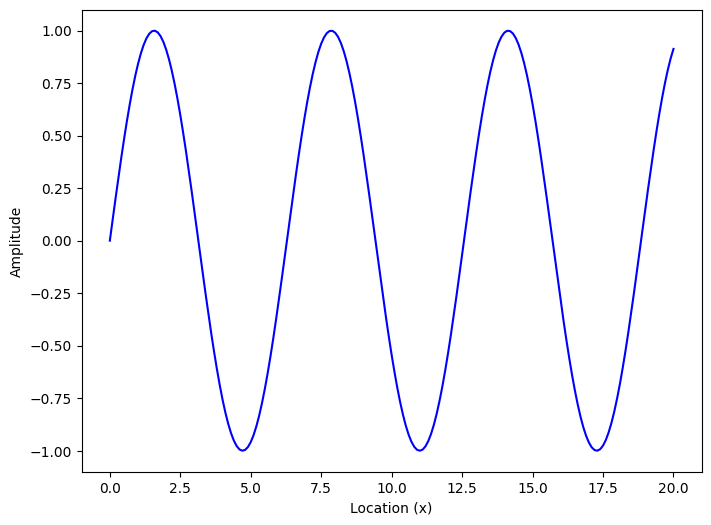

In [2]:
x = np.linspace(0, 20, 201)
y = np.sin(x)

plt.figure(figsize = (8, 6))
plt.plot(x, y, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.show()

- sine wave는 시간과 공간에 따라 바뀐다.
- 매 초마다 스냅샷을 보고 그 중에 $x=2.5$에서 시간에 따라 어떻게 바뀌는 지 관찰해 본다.

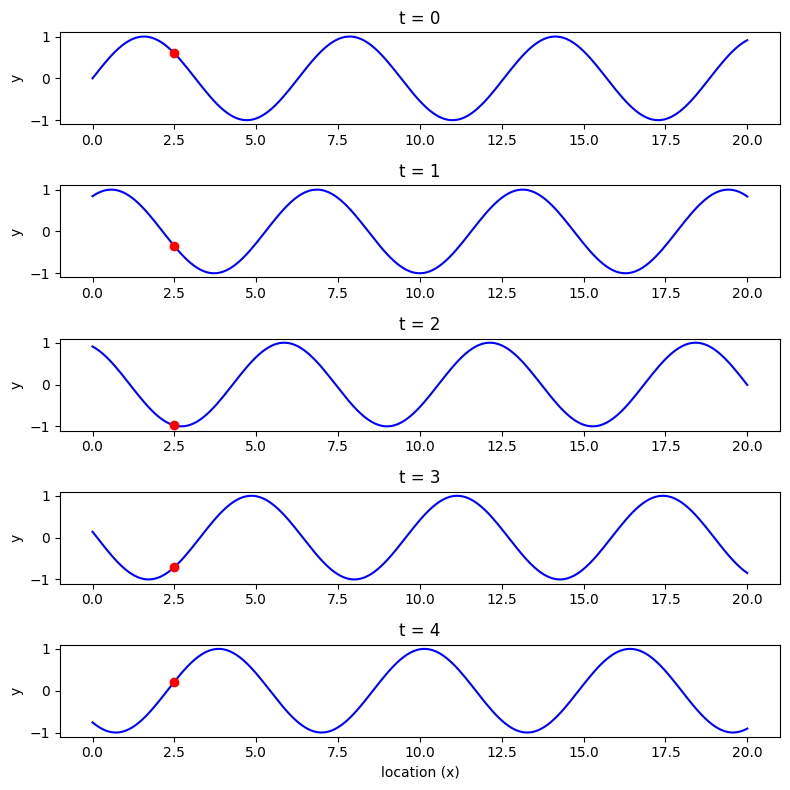

In [3]:
fig = plt.figure(figsize = (8,8))

times = np.arange(5)

n = len(times)

for t in times:
    plt.subplot(n, 1, t+1)
    y = np.sin(x + t)
    plt.plot(x, y, 'b')
    plt.plot(x[25], y [25], 'ro')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {t}')

plt.xlabel('location (x)')
plt.tight_layout()

#### 파동의 특징
- 실제로 각종 sensor를 이용하여 공간적으로 시간적으로 이산화해서 컴퓨터에 저장하여 처리한다.
- 아래 그림과 같이 'o' 값만 저장한다 (이산화 위치).

<img src='24.01.01-period_amplitude.jpg' width='600px'>  
<img src=24.01.02-wavelength_amplitude.jpg width='600px'>  

- **Amplitude** (진폭): baseline으로부터 최대 변위 (cf, 높이)
- **period**: 반복 주기

> $period=\frac{1}{frequency}$

- **sampling rate**: 10 samples/sec 이면 1초에 10번 sampling한다.

- **angular frequency and phase**

> $y(t)=Asin(\omega t+\phi)$, $\omega$: angular frequency (radians/sec),  $\phi$: phase(radian)

> $\omega = \frac{2\pi}{T}=2\pi f$, $T$: 주기, $f$: frequency

#### 실습
(1) 0~1초 사이의 5Hz와 10Hz sine wave를 100 samples/sec sampling rate로 그려라

(2) 0~1초 사이의 5Hz sine wave를 100 samples/sec으로 그리는 phase=0, 10 두 가지 경우에 그려라

**1.6scipy3 quiz 문제 1,2**

#### Discrete Fourier Transform (DFT)
- sine wave와 같은 간단한 wave는 period/frequency, amplitude, phase로 쉽게 특징을 찾을 수 있다.
- 그러나 다음과 같은 복잡한 wave는 amplitude와 frequency가 무엇일까?

<img src='24.02.01-waves_with_3sine.jpg' width='600px'>

- 이와 같은 복잡합 wave 를 분석하는 방법: **Fourier Transform**

<img src='24.02.02-time_frequency.png' width='600px'>

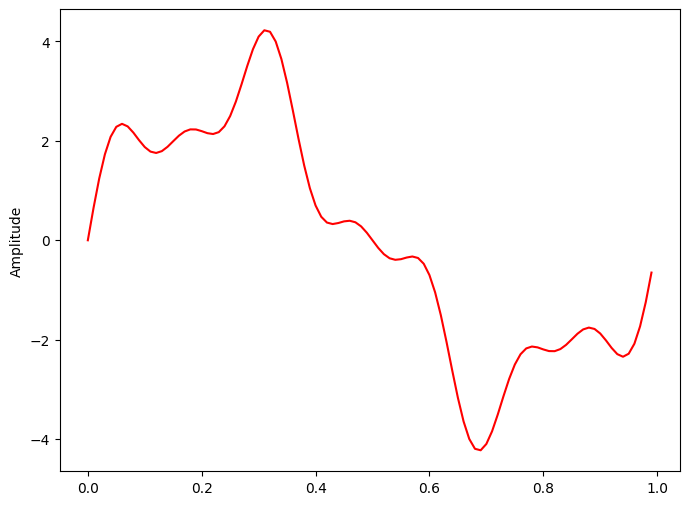

In [4]:
#상기 신호는 아래와 같이 1Hz, 4Hz, 7Hz sin 함수의 선형조합으로 이루어 졌다.
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

#### Fourier series
- 어떤 주기 함수이던지 같은 주기와 고조파의 일차 결합으로 표시될 수 있다.

$f(t)=a_0+\sum \limits_{n=1}^{N}\left(a_n cos\left(\frac{2\pi nt }{T}\right) + b_n sin\left(\frac{2\pi nt }{T}\right)\right)$

**Euler's formular** 를 이용하면 compact하게 표현이 가능하다.
- Euler's formular   
$e^{i\theta}=cos\theta + isin\theta$  
> $cos\theta = \frac{e^{i\theta}+e^{-i\theta}}{2}$  
> $sin\theta = -i\frac{e^{i\theta}-e^{-i\theta}}{2}$
- compact Fourier series

$f(t)=\sum \limits_{n=-N}^{N}c_n e^{\frac{i2\pi nt}{T}}$

- complex Fourier series의 특징
    - $c_n$은 복소수이다. 
    - $c_n = c_{-n}^*$, 즉 $c_n$과 $c_{-n}$ 은 크기가 같다. 
    - $c_0$는 DC 성분의 크기이다.
- scipy fftpack module은 fft 와 ifft를 제공한다.
    - fft를 한 결과 array가 sfft라면 sfft[0]에 DC가 들어 있고, sfft[1]과 sfft[-1]에 기본주기의 계수가 들어 있다.
    - 즉 sfft[n]에는 $c_n$ sfft[-n]에는 $c_{-n}$ 이 들어 있다.

Text(94, 11.626053796283115, '3rd')

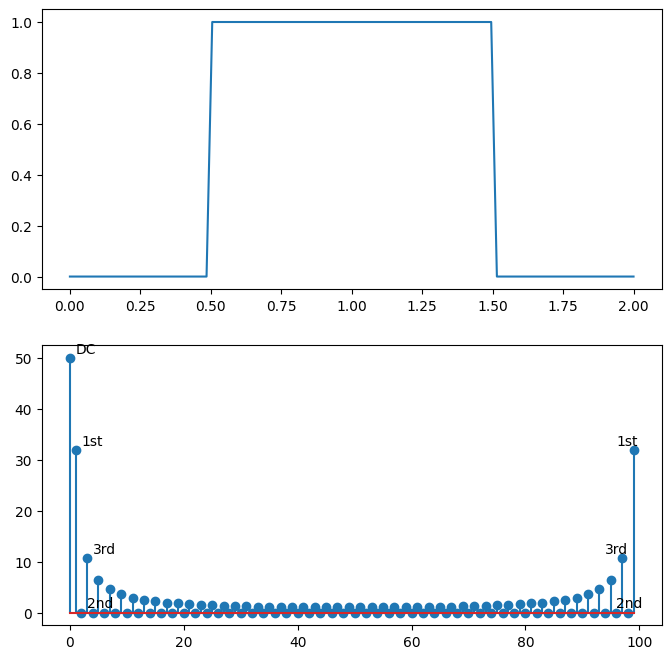

In [5]:
# 구형파 예제 (square wave)
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
# 구형파 generation
x=np.linspace(0,2,100)
y=np.zeros(100)
y[np.where(x>0.5)]=1
y[np.where(x>1.5)]=0

# plot signal and fft
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(x,y)
sfft = fftpack.fft(y)
plt.subplot(212)
plt.stem(np.abs(sfft))
nof = len(sfft)
dx,dy=1,1
plt.text(0+dx,np.abs(sfft)[0]+dy,'DC')
plt.text(1+dx,np.abs(sfft)[1]+dy,'1st')
plt.text(nof-1-3*dx,np.abs(sfft)[-1]+dy,'1st')
plt.text(2+dx,np.abs(sfft)[2]+dy,'2nd')
plt.text(nof-2-3*dx+dx,np.abs(sfft)[-2]+dy,'2nd')
plt.text(3+dx,np.abs(sfft)[3]+dy,'3rd')
plt.text(nof-3-3*dx,np.abs(sfft)[-3]+dy,'3rd')

<StemContainer object of 3 artists>

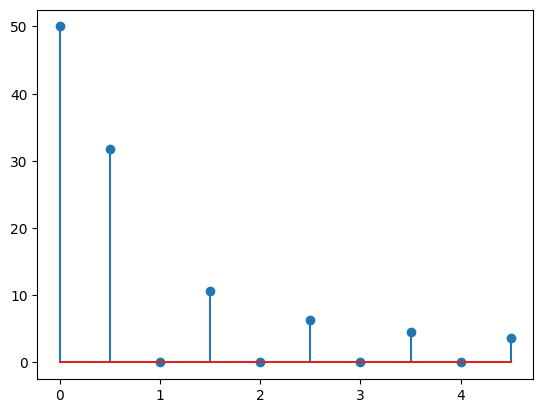

In [6]:
# x축을 frequency로 표현하려면 fundamental freq. 의 multiple로 x축을 잡아야 한다.
T=2
fs=1/T
freqs = np.arange(0,nof*fs,fs)
plt.stem(freqs[:10],(np.abs(sfft))[:10])

<StemContainer object of 3 artists>

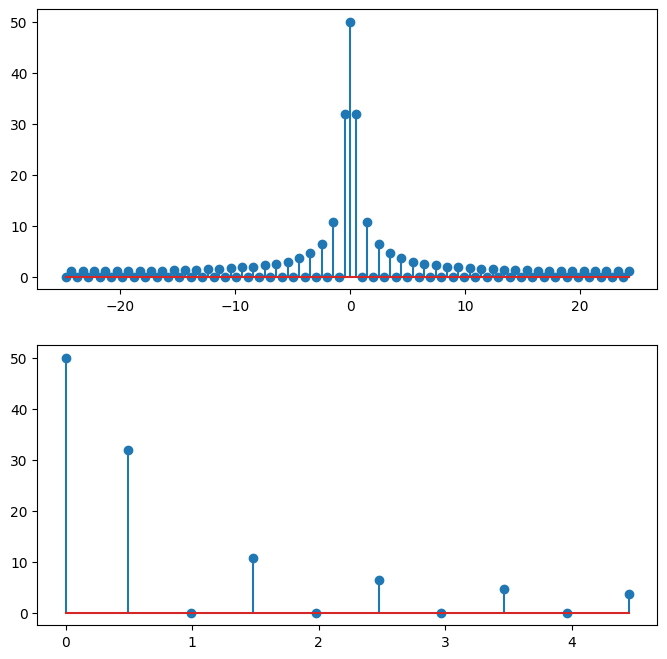

In [7]:
# fftpack에는 freqs 를 계산해 주는 함수 fftfreq 를 제공한다.
freqs = fftpack.fftfreq(nof,x[1]-x[0])
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.stem(freqs,np.abs(sfft))
plt.subplot(212)
plt.stem(freqs[:10],np.abs(sfft)[:10])

<StemContainer object of 3 artists>

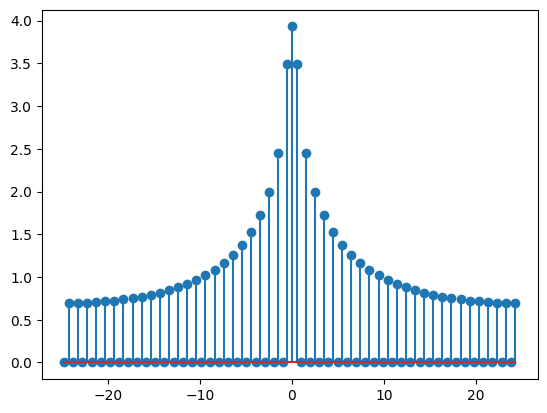

In [8]:
# log display: 상대적으로 작은 고주파 성분을 알아보기 쉽도록 display한다.
plt.stem(freqs,np.log(1+np.abs(sfft)))

**inverse FFT**
- fftpack의 ifft 함수를 사용해서 원래 신호를 복원할 수 있다.


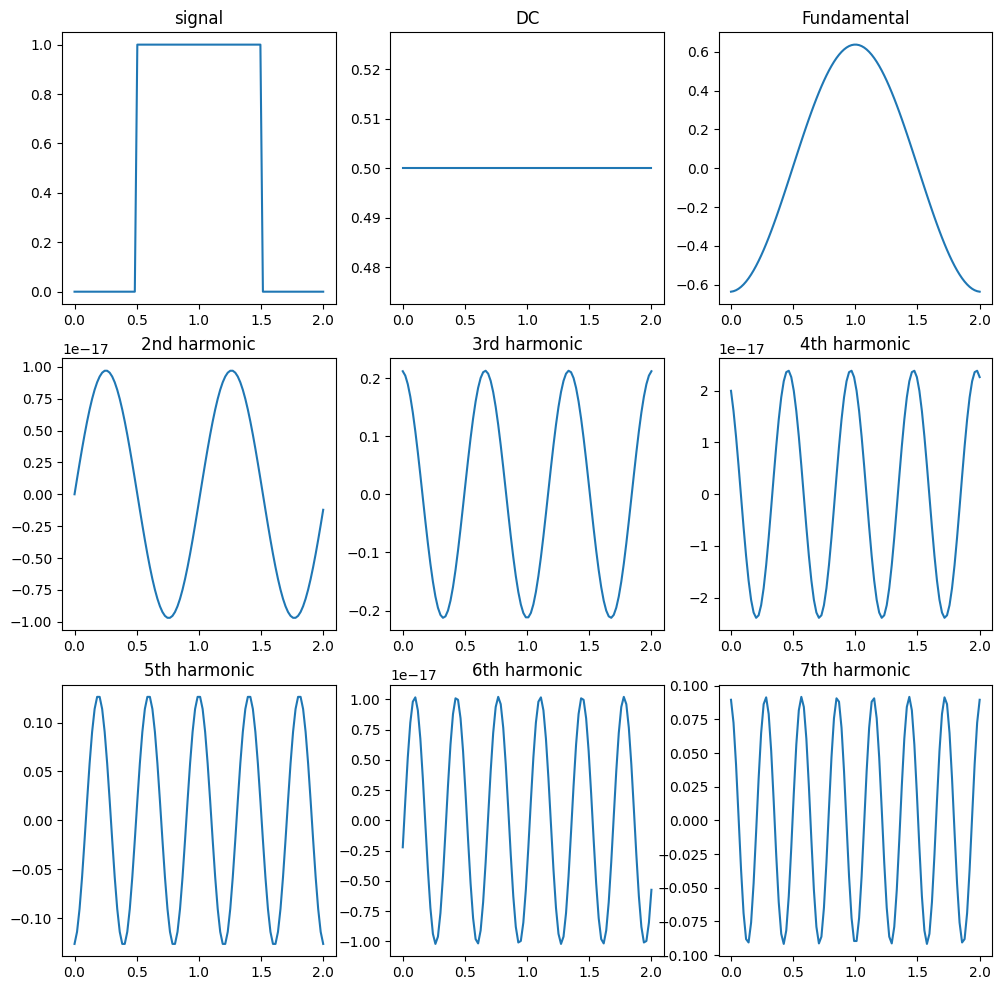

In [9]:
# 7th harmonic 까지 plot
titles=['signal','DC','Fundamental','2nd harmonic','3rd harmonic','4th harmonic'
        ,'5th harmonic','6th harmonic','7th harmonic']
plt.figure(figsize=(12,12))
plt.subplot(331)
plt.plot(x,y)
plt.title(titles[0])
for i in range(8):
    fsfft=sfft*0
    if i==0: 
        fsfft[0]=sfft[0] #DC
    else:
        fsfft[i]=sfft[i]
        fsfft[-i]=sfft[-i]
    ifs = fftpack.ifft(fsfft)
    plt.subplot(3,3,i+2)
    plt.plot(x,ifs.real)
    plt.title(titles[i+1])

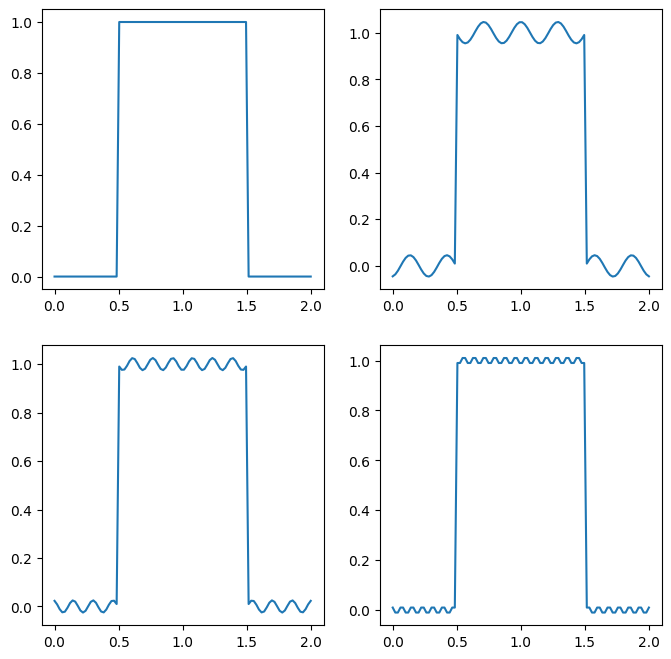

In [10]:
# 3,6,12,24th harmonic까지를 ifft 한 결과
hms = [3,6,12,24]
plt.figure(figsize=(8,8))
for idx,hm in enumerate(hms):
    fsfft=sfft*0
    fsfft[:hm+1]=sfft[:hm+1]
    fsfft[hm+2:]=sfft[hm+2:]
    sig = fftpack.ifft(fsfft)
    plt.subplot(2,2,idx+1)
    plt.plot(x,sig.real)


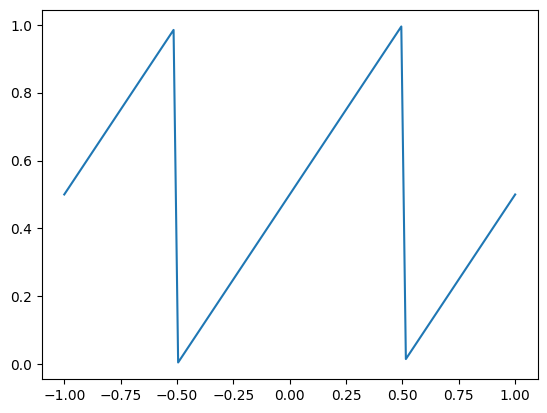

In [11]:
# 톱니파 예제
T=1
x=np.linspace(-T,T,100)
y=x+0.5
y[np.where(x <= -T/2)] += T
y[np.where(x > T/2)] -= T
plt.plot(x,y)

<StemContainer object of 3 artists>

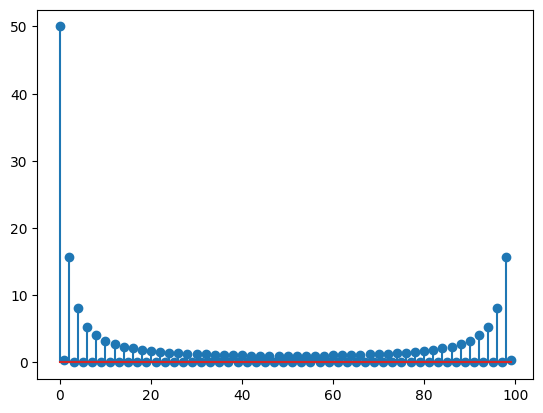

In [12]:
# 주파수 성분
from scipy import fftpack
fs = fftpack.fft(y)
plt.stem(np.abs(fs))

<StemContainer object of 3 artists>

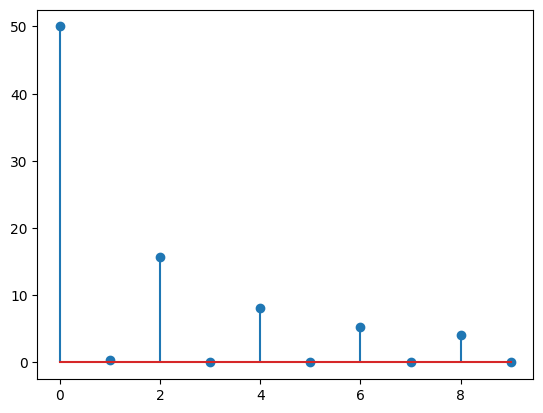

In [13]:
plt.stem(np.abs(fs[:10]))

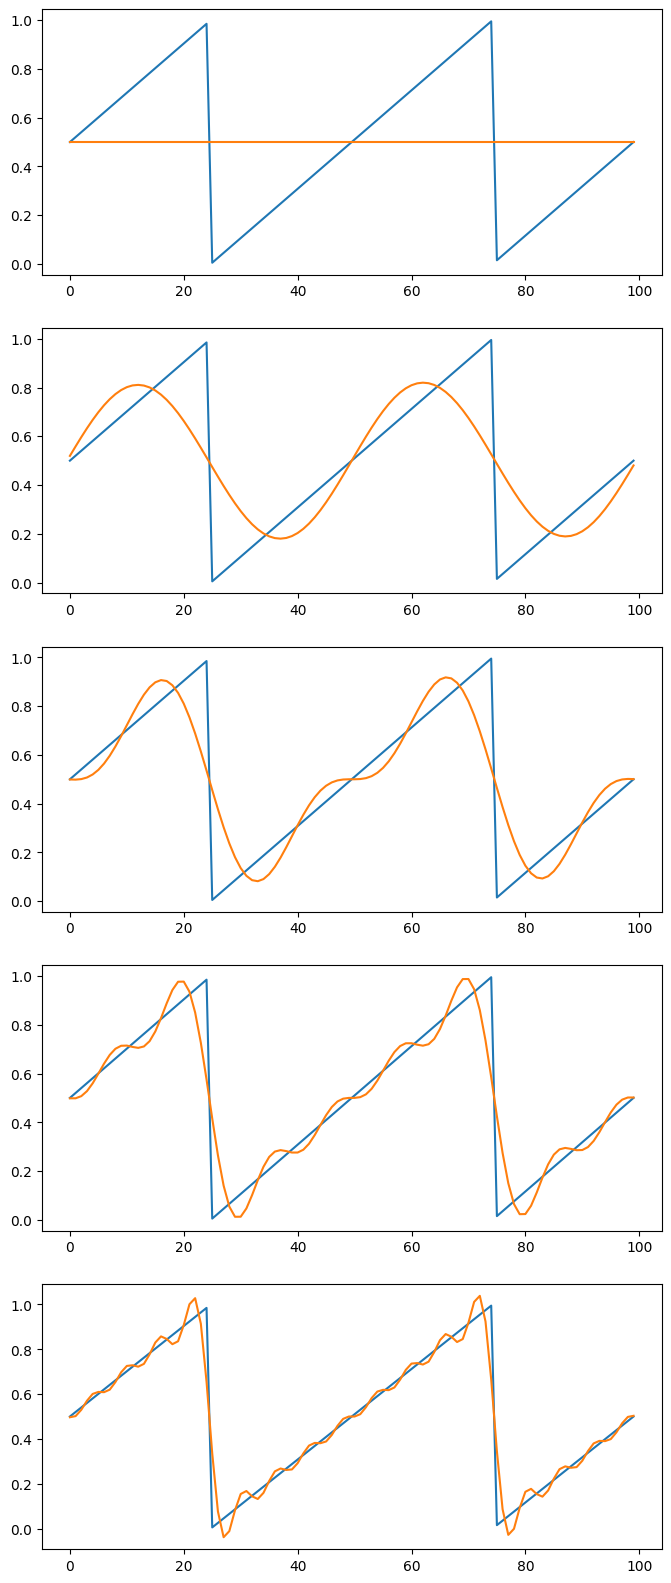

In [14]:
# nth harmonic까지만 남겨서 ifft 했을 경우의 복원 신호
hms = [0, 2, 4, 8, 16]
nop = len(hms)
plt.figure(figsize=(8,nop*4))
for idx, noh in enumerate(hms):
    ffs = fs.copy()
    if noh == 0: ffs[1:]=0
    else: ffs[noh+1:-noh]=0
    rs = fftpack.ifft(ffs)
    plt.subplot(len(hms),1,idx+1)
    plt.plot(y)
    plt.plot(rs.real)

**1.6scipy3 quiz 문제 3~4**

#### low pass 특성
- 대부분의 신호는 저주파 power가 강하고 주파수가 높을 수록 급격히 작아진다.
- 귀는 20~20kHz까지 들을 수 있다.
- 눈의 공간해상도 (먼곳이 잘 안보임) 와 잔상 (영화를 볼 수 있는 이유)
- 이를 이용하여 고주파 성분을 없애서 저장이나 전송을 위한 압축을 할 수 있다.
- 고주파 잡음을 잘라낼 수 있다.

#### 귀의 mechanism
<img src='cochleaDiagram.jpg' width='600px'>
<img src='uncoiledCoclea.png' width='600px'>

- 귀는 주파수를 직접 sensing한다. 즉 달팽이 관에서 Fourier transform을 한다고 생각 할 수 있다.
- 어느 대역의 sensing 능력이 낮아지면 그 부분을 증폭해서 들려주면 된다 (보청기)
    - <마이크>-><신호처리>-><스피커>
    - 신호처리: Fourier transform->손상대역 증폭->inverse Fourier transform

#### sound example
**음계**
- A440 은 440Hz 라음
- A880 은 높은 라음
- 12반음을 올리면 2배 주파수가 된다.
- 가온다 부터 다음과 같은 순서로 $2^{1/12}$ 배로 계산하면 된다.
    - C, C#, D, D#, E, F, F#, G, G#, A, A#, B, C
    - C freq: $440\times -2^{\frac{9}{12}}$

In [15]:
import numpy as np
# 각 계음의 frequency
octave = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'C+']
freqs=np.zeros(len(octave))
# 가온다
freqs[0] = 440*np.power(2,-9/12)
for i in range(1,len(octave)):
    freqs[i]=freqs[i-1]*(np.power(2,1/12))
octFre=dict(zip(octave,freqs))
octFre

{'C': 261.6255653005986,
 'C#': 277.1826309768721,
 'D': 293.6647679174076,
 'D#': 311.1269837220809,
 'E': 329.62755691287,
 'F': 349.22823143300394,
 'F#': 369.99442271163446,
 'G': 391.9954359817494,
 'G#': 415.30469757994524,
 'A': 440.0000000000001,
 'A#': 466.16376151809004,
 'B': 493.88330125612424,
 'C+': 523.2511306011975}

In [16]:
#'도미솔도'의 생성
from IPython.display import Audio
samplerate = 44100
seqs = ['C','E','G','C+']
t = np.linspace(0, 1, samplerate)
data = []
for idx,val in enumerate(seqs):
    fs = octFre[val]
    data=np.append(data,np.sin(2. * np.pi * fs * t))
Audio(data,rate=samplerate)

**사람 목소리 예**
- https://audiomass.co/ 에서 배성렬.wav를 잘라냄

In [17]:
from scipy.io.wavfile import read, write
rate, data = read('배성렬_cut.wav')
print('wav 속성',rate, data.shape)
voice = data[:,0] # 스테레오 이므로 한 channel만 신호를 가져온다.
duration=len(data)/rate # len(data)는 no. samples이고 rate는 samples/sec 이므로 둘을 나누면 시간이 된다.|
print(duration)
Audio(voice,rate=rate)

wav 속성 44100 (157216, 2)
3.5649886621315194


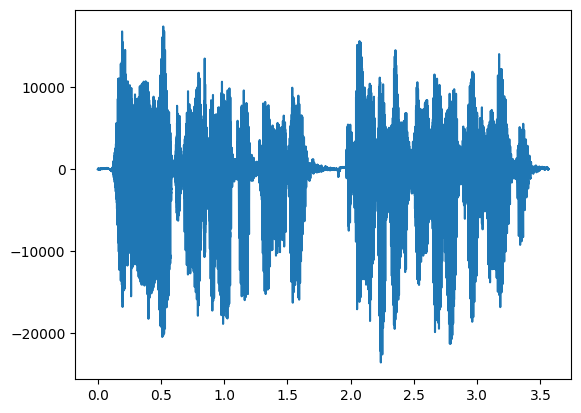

In [18]:
# 소리 plot
import matplotlib.pyplot as plt
intval=1/rate
x=np.arange(0,len(voice)*intval,1/rate) #sampling rate 간격으로 sample수 만큼
plt.plot(x,voice)

#### 사람 목소리의 저주파 특성
- 저주파만으로 복원했을 때의 사람 목소리
    - 사람이 누구인지 무슨 소리인지 알기 위하여 4kHz까지만 있어도 된다
    - 전화는 목소리를 4KHz로 잘라내서 8kHz로 sampling하여 각 sample 당 8bit를 할당한다
    - 그러므로 64kbps로 통신하고 있다.
- 음악은 20kHz 전체를 들려주기 위하여 44.1kHz 16bit로 sampling한다.
    - FM: 10kHz
    - 전화 노래방 소리는 품질이 안 좋다.
    - 압축필요: MPEG layer 3 (mp3)

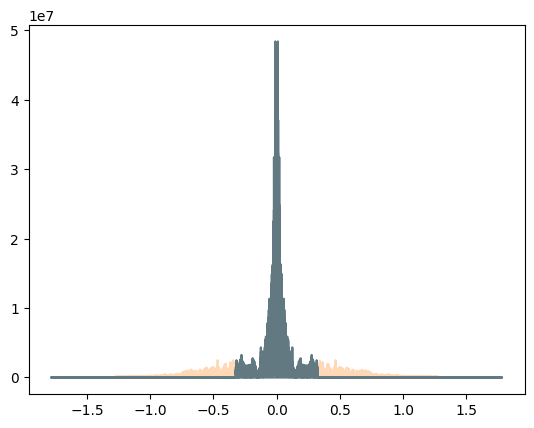

In [19]:

from scipy import fftpack
sfft = fftpack.fft(voice)
fs = 1/duration # fundametal freq = 1/(total period)
cut_freq=4000 # 1k cut off
wing=int(cut_freq/fs)
fsfft=sfft.copy()
fsfft[wing:-wing]=0
fvoice = fftpack.ifft(fsfft).real
freqs = fftpack.fftfreq(len(fvoice),d=fs)
plt.plot(freqs,np.abs(fsfft))
plt.plot(freqs,np.abs(sfft),alpha=0.3)
Audio(fvoice,rate=rate)

#### image FFT

(302, 598, 4)

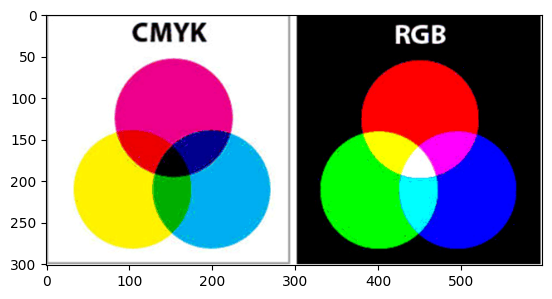

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

img = plt.imread('panel_description_color_cmy_rgb.gif')
plt.imshow(img)
img.shape

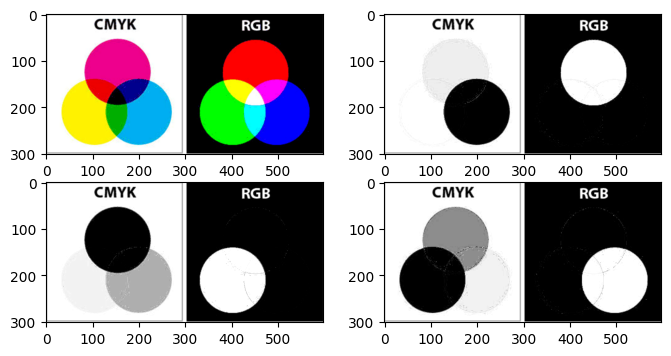

In [21]:
# color 채널 display
plt.figure(figsize=(8,4))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
gimg = img[:,:,0]
plt.imshow(gimg,cmap='gray')
plt.subplot(223)
gimg = img[:,:,1]
plt.imshow(gimg,cmap='gray')
plt.subplot(224)
gimg = img[:,:,2]
plt.imshow(gimg,cmap='gray')

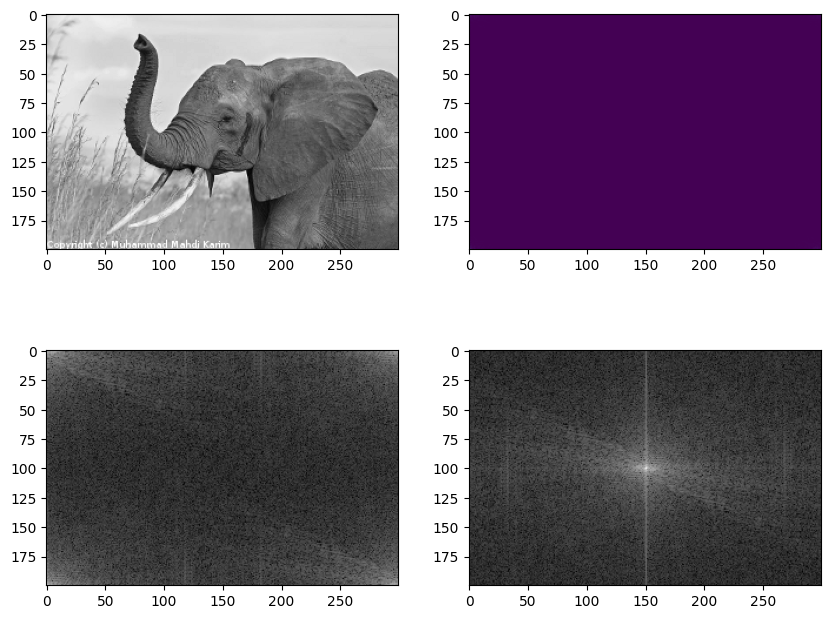

In [22]:
# 2D fft 와 display
elephant = plt.imread('elephant.png')
gimg = elephant[:,:,1]
gimg_f=fftpack.fft2(gimg)
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(gimg,cmap='gray')
plt.subplot(222)
plt.imshow(np.abs(gimg_f))
plt.subplot(223)
plt.imshow(np.log(1+np.abs(gimg_f)),cmap='gray')
plt.subplot(224)
gimg_f_shift=fftpack.fftshift(gimg_f)
plt.imshow(np.log(1+np.abs(gimg_f_shift)),cmap='gray')

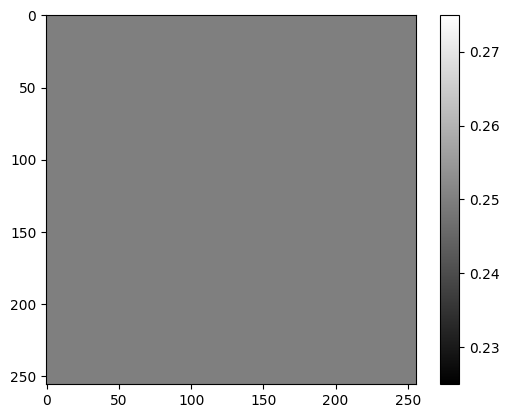

In [23]:
# 2D image의 주파수 성분
N=256
scale = N/2*N/2
fimg=np.zeros((N,N))
#DC
fimg[0,0]=scale
img=fftpack.ifft2(fimg)
plt.imshow(img.real,cmap='gray')
plt.colorbar()

**2D fft harmonics**
> image 좌표는 (y,x) 임을 주의
- (0,0): DC
- (0,1): horizontal 1st harmonic
- (0,2): horizontal 2nd harmonic
- (1,0): vertical 1st harmonic
- (2,0): vertical 2nd harmonic
- (1,1): h 1st and v 1st harmonic
- (1,2): h 2nd and v 1st harmonic
- (2,1): h 1st and v 2nd harmonic

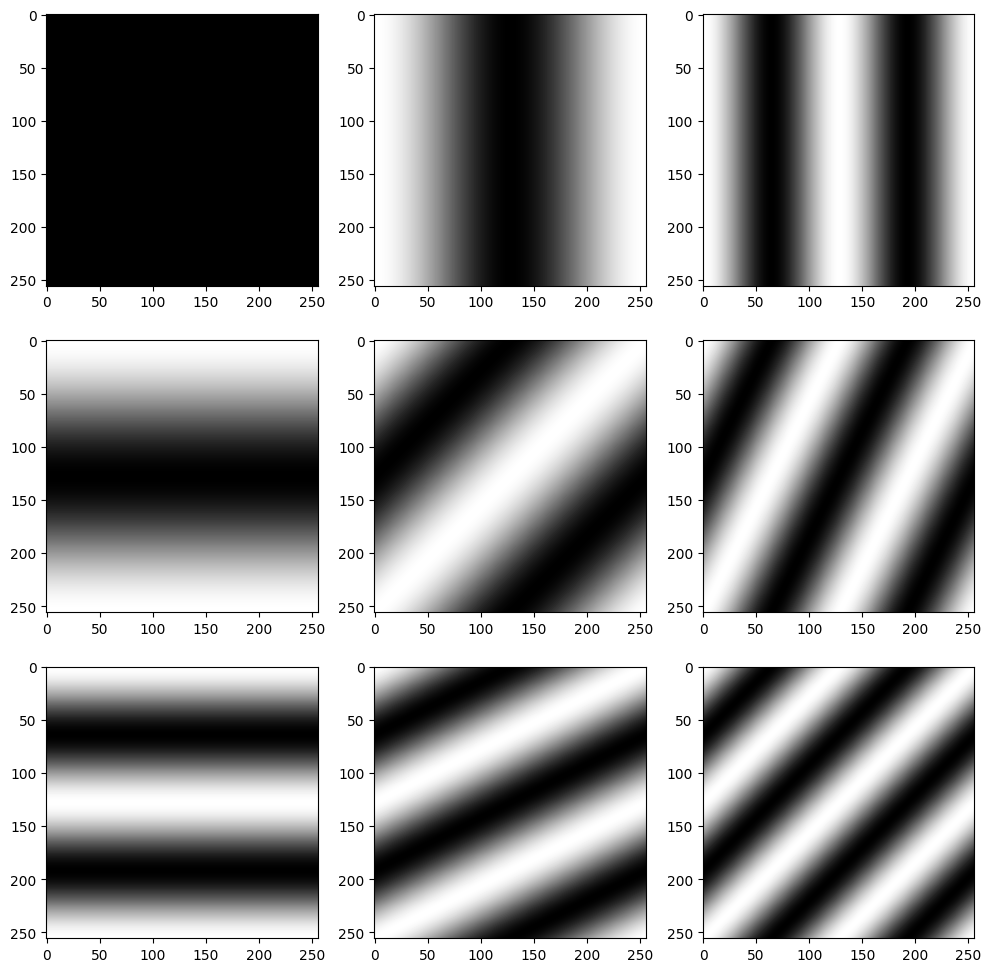

In [24]:
#2D fft harmonics
scale = N/2*N/2
cnt=np.array([int(N/2),int(N/2)])
plt.figure(figsize=(12,12))
for v in range(3):
    for h in range(3):
        fimg_s=np.zeros([N,N])
        fimg_s[tuple(cnt+[v,h])]=scale
        fimg_s[tuple(cnt-[v,h])]=scale
        fimg = fftpack.fftshift(fimg_s)
        img=fftpack.ifft2(fimg)
        plt.subplot(3,3,h+v*3+1)
        plt.imshow(img.real,cmap='gray')

**2d fft images**
- image 에서 폭이 작으면 주파수 영상에서 폭이 커진다.
- 수직 패턴은 주파수 영상에서 x축에 몰려있다.
- 수평 패턴은 주파수 영상에서 y축에 몰려 있다.
- 원형 대칭 영상은 주파수 영상이 원형 대칭이다.

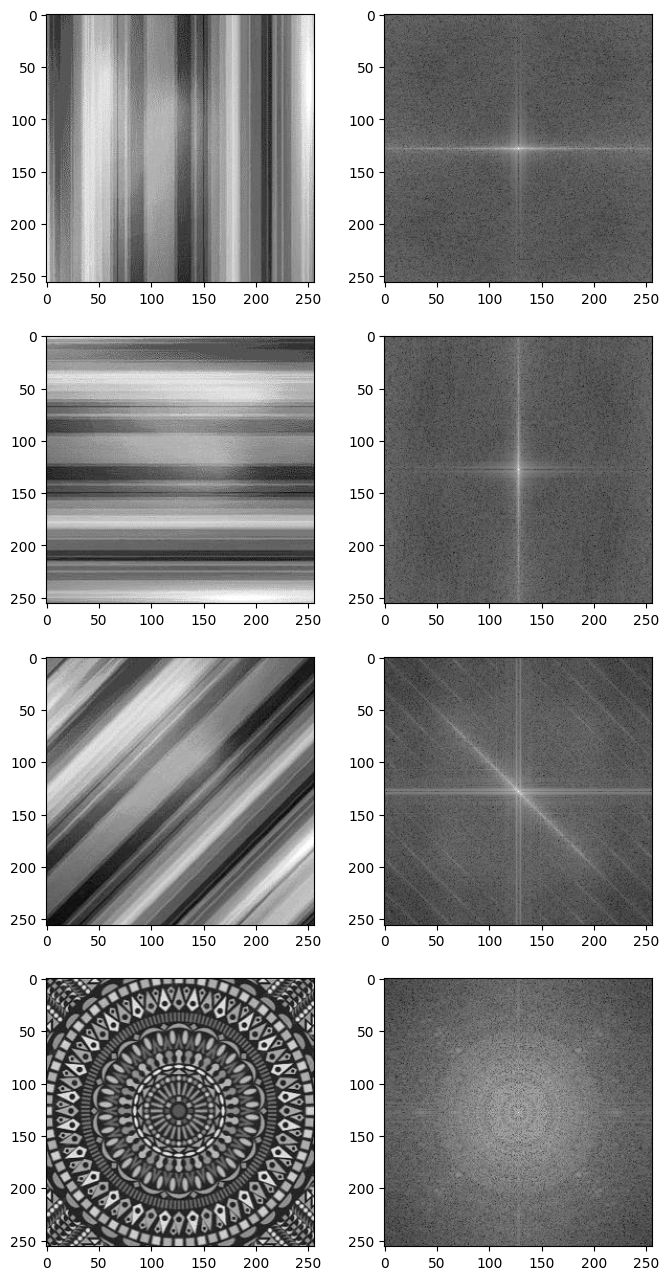

In [25]:
# 수평, 수직, 대각선 패턴
# image pattern 방향 수직인 방향으로 값이 몰려 있다.
fnames = ['h_pattern.jpg','v_pattern.jpg','d_pattern.jpg','c_pattern.jpg']
plt.figure(figsize=(8,16))
for idx, fname in enumerate(fnames):
    img=plt.imread(fname)
    plt.subplot(4,2,idx*2+1)
    plt.imshow(img,cmap='gray')
    fimg=fftpack.fft2(img)
    fimg_s=fftpack.fftshift(fimg)
    plt.subplot(4,2,idx*2+2)
    plt.imshow(np.log(1+np.abs(fimg_s)),cmap='gray')


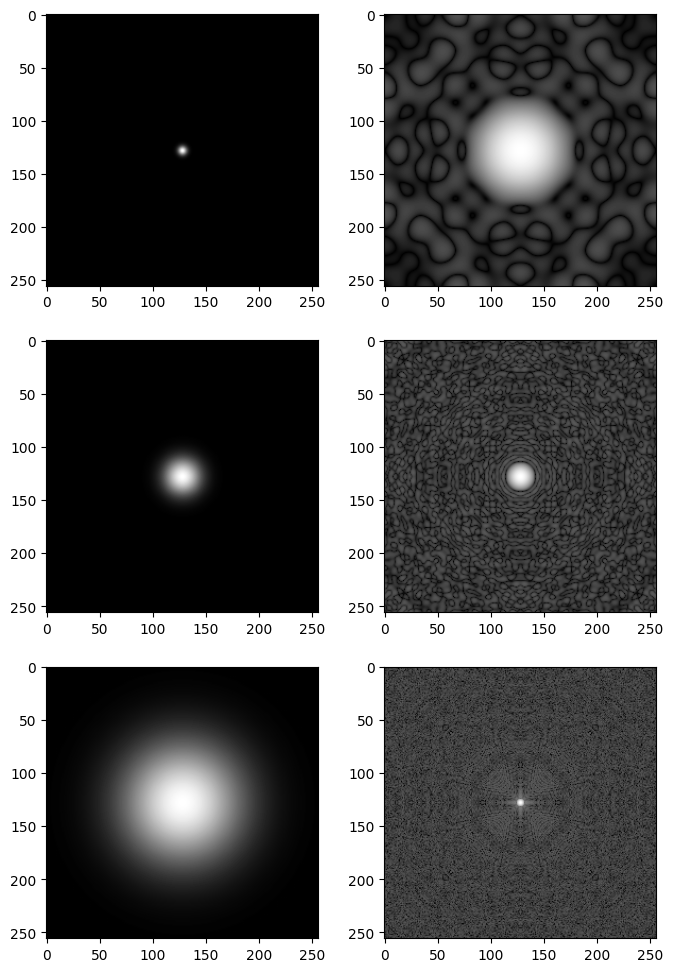

In [26]:
# image 폭이 작으면 주파수가 퍼진다.
def f(x,y,s,N):
    return 256*np.exp(-((x-N/2)**2+(y-N/2)**2)/(2*s**2))
def makeImg(s,N):
    img = np.zeros((N,N))
    x=np.arange(N)
    y=np.arange(N)
    xv,yv=np.meshgrid(x,y)
    img=f(xv,yv,s,N).astype(int)
    return img

N=256
imgl = [makeImg(3,N),makeImg(12,N),makeImg(40,N)]
noi = len(imgl)
plt.figure(figsize=(8,12))
for i in range(noi):
    img = imgl[i]
    plt.subplot(noi,2,i*2+1)
    plt.imshow(img,cmap='gray')
    fimg=fftpack.fft2(img)
    fimg_s=fftpack.fftshift(fimg)
    plt.subplot(noi,2,i*2+2)
    plt.imshow(np.log(1+np.abs(fimg_s)),cmap='gray')

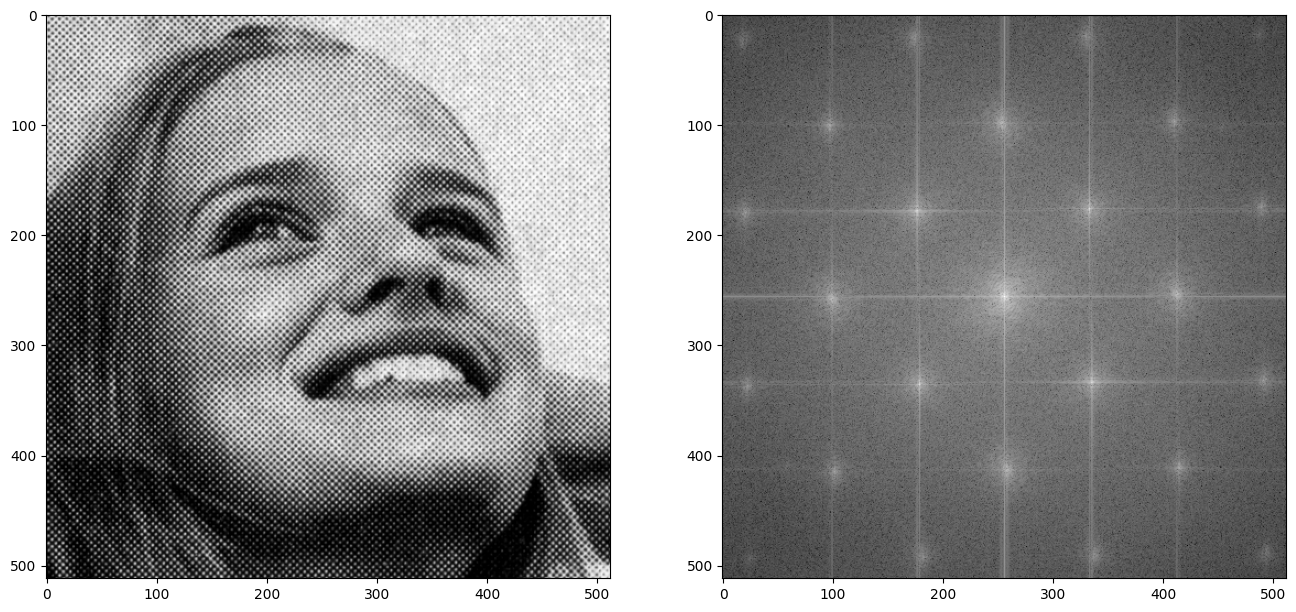

In [27]:
# filtering example (인쇄한 영상 스캔한 영상)
# 인쇄 패턴이 보일 정도로 스캔하면 원래 주파수 성분이 패턴형태로 반복된다 (modulation effect)
# 인쇄 패턴을 없애기 위해 원래 주파수 성분이라고 생각되는 부분만 남기고 지운다음 ifft2 한다.
img = plt.imread('print.tif')
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img,cmap='gray')
fimg = fftpack.fft2(img)
fimg_s=fftpack.fftshift(fimg)
plt.subplot(122)
plt.imshow(np.log(1+np.abs(fimg_s)),cmap='gray')

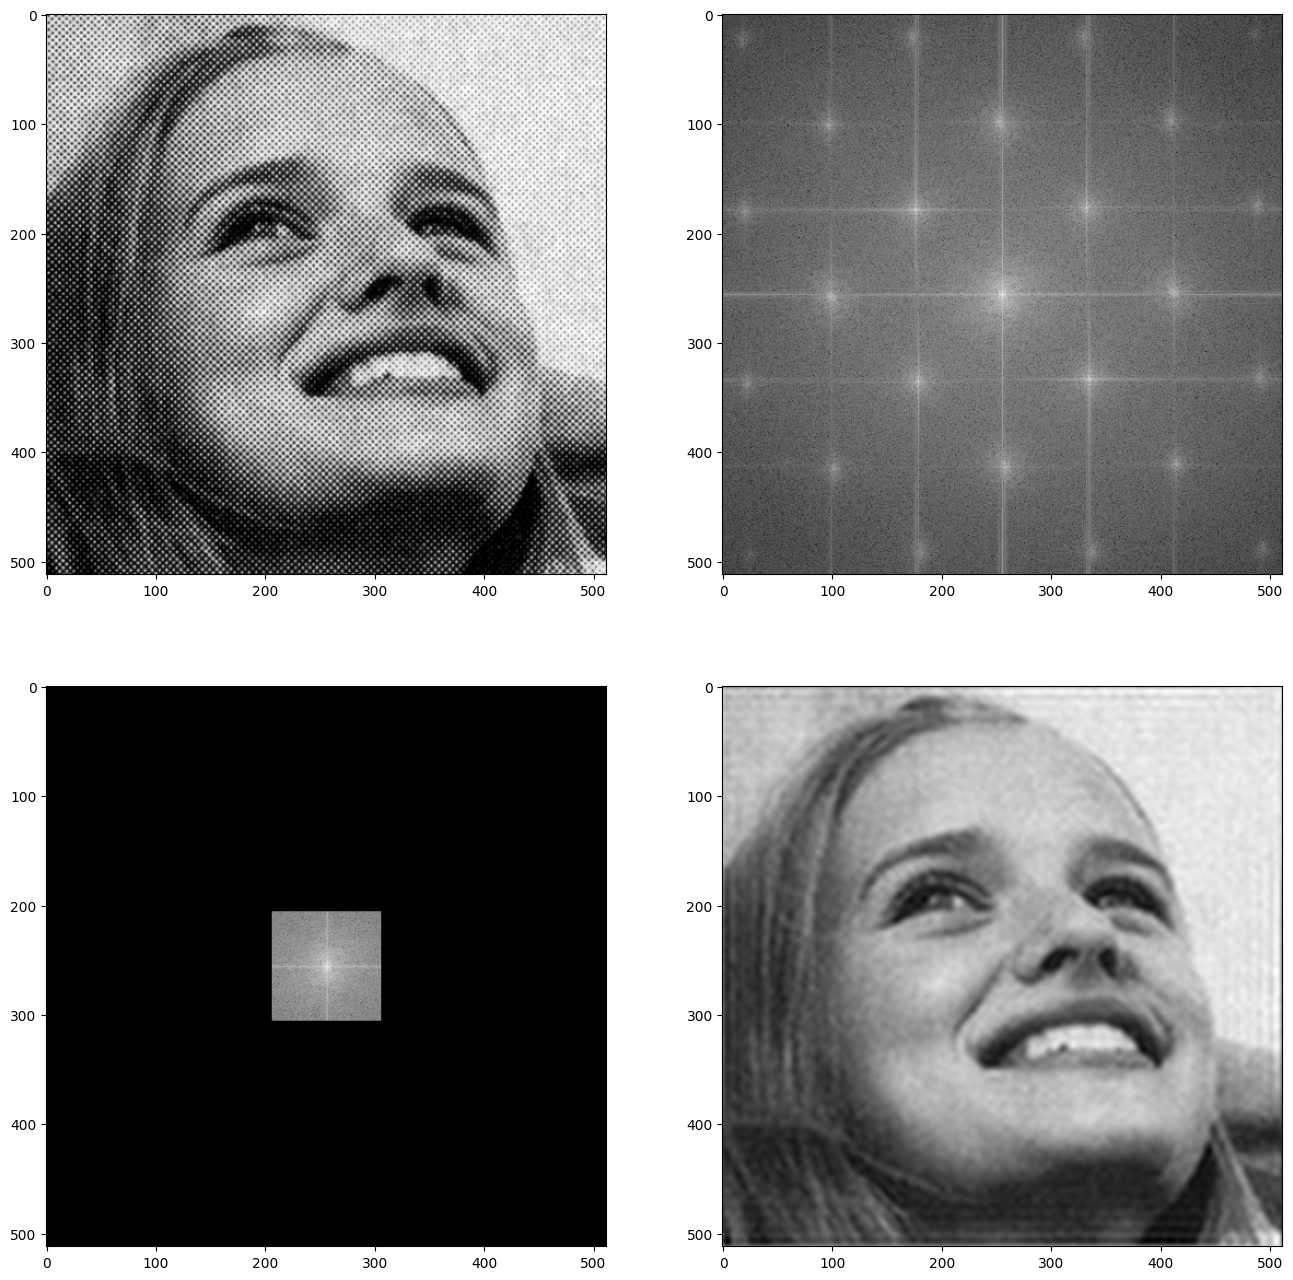

In [28]:
ffimg_s=fimg_s*0
w=50
ffimg_s[256-50:256+50,256-50:256+50]=fimg_s[256-50:256+50,256-50:256+50]
ffimg=fftpack.fftshift(ffimg_s)
rimg = fftpack.ifft2(ffimg).real

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img,cmap='gray')
plt.subplot(222)
plt.imshow(np.log(1+np.abs(fimg_s)),cmap='gray')
plt.subplot(223)
plt.imshow(np.log(1+np.abs(ffimg_s)),cmap='gray')
plt.subplot(224)
plt.imshow(rimg,cmap='gray')